## Census Income Dataset

## Problem Statement :
The dataset given below contains the census information about the attributes of individuals as the features and their income as the target. The task is to predict whether a person makes over $50K a year or not.

## About the dataset:
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics).  

The data has 1032 instances and 15 features. For your information the target variable `Income` has already been label encoded.
1 indicates the income is greater than or equal to 50K. 0 indicates the income is less than 50K. Below is a brief about the features in the dataset.

|Features|Description|
|-----|-----|
|age|Age of the person|
|Workclass|Categorical variable having 8 categories each denoting the type of employment|
|fnlwgt|final weight. |
|education|Categorical variable with 16 categories each denoting the qualification of the person.|
|education-num|number of years of education|
|marital-status|Categorical variable with 7 categories|
|occupation|Categorical variable with 14 categories each denoting the type of occupation of the individual|
|relationship|Categorical variable with 6 categories.|
|race|Categorical variable with 5 categories each denoting the ethnicity of the individual|
|sex|Gender of the person|
|capital-gain|Continuous| 
|capital-loss|Continuous|
|hours-per-week|Working hours per week|
|native-country|Categorical|
|Income|Target variable. 1 indicates >=50k. 0 indicates <50K|



### Reading the data using pandas module.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [8]:
dataframe = pd.read_csv('data/adult_preprocessed.csv',index_col=0)

In [9]:
dataframe.head()

age          Workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  Income  
0          2174             0              40   United-States       0  
1             0             0              13   United-States       0  
2             0             0              40   United-States       0  
3             0             0              40   United-States       0  
4             0             0              40            Cuba       0

### Check for null values and get a summary of all the columns in the dataset

In [12]:
# Check for null values
dataframe.isnull().sum()

age               0
Workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [13]:
# Get a summary of the columns in the dataset
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032 entries, 0 to 1119
Data columns (total 15 columns):
age               1032 non-null int64
Workclass         1032 non-null object
fnlwgt            1032 non-null int64
education         1032 non-null object
education-num     1032 non-null int64
marital-status    1032 non-null object
occupation        1032 non-null object
relationship      1032 non-null object
race              1032 non-null object
sex               1032 non-null object
capital-gain      1032 non-null int64
capital-loss      1032 non-null int64
hours-per-week    1032 non-null int64
native-country    1032 non-null object
Income            1032 non-null int64
dtypes: int64(7), object(8)
memory usage: 129.0+ KB


### For further analysis split to bring all the continuous variables together and categorical variables together.

In [28]:
#cols = dataframe.dtypes[dataframe.dtypes == object].index
#cols
#categorical = dataframe[cols]
#continous = dataframe.drop(cols,axis = 1)
#print(categorical.columns)
#print(continous.columns)
cat_cols = dataframe.select_dtypes(include =['object'])
num_cols = dataframe.select_dtypes(exclude =['object'])


Index(['Workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')
Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'Income'],
      dtype='object')


###  Plotting a stacked bar chart, have an estimate of the number of people with income above and below 50K with respect to each of the categorical features

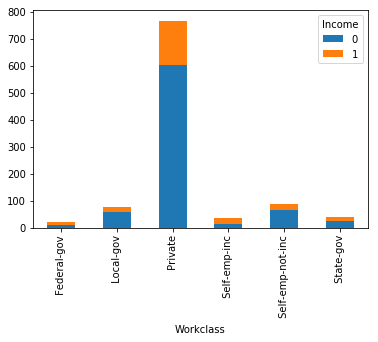

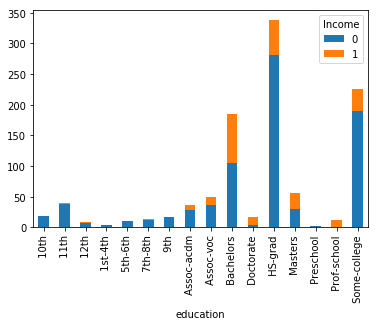

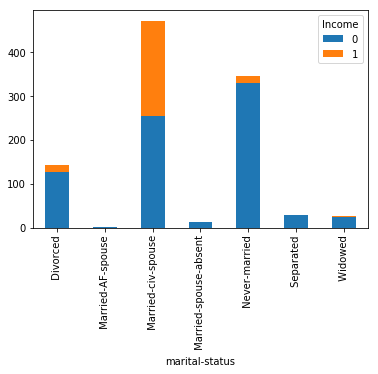

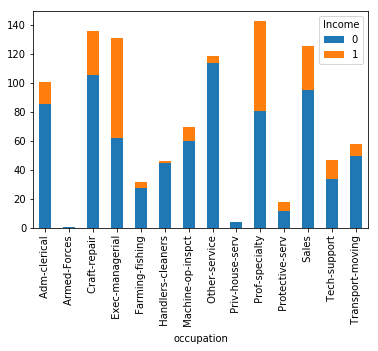

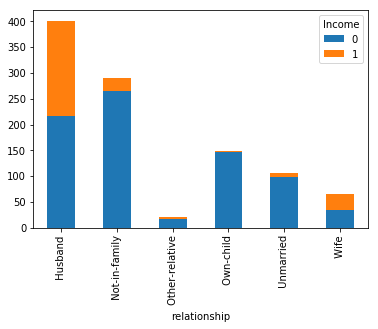

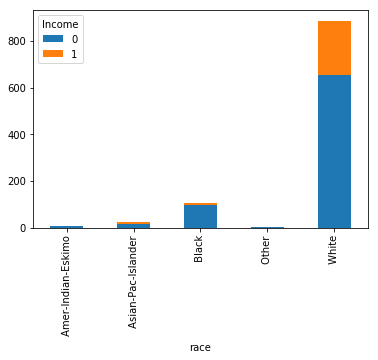

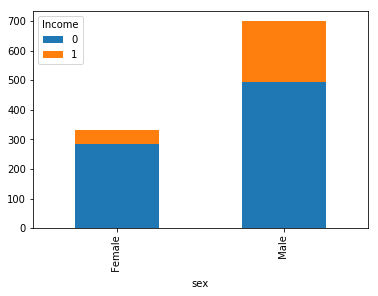

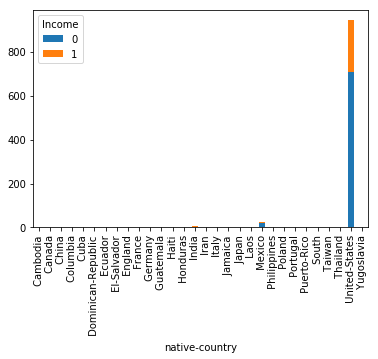

In [46]:
#num_cols.Income.value_counts().plot(kind='bar',stacked=True)
for col in cat_cols.columns:
    dataframe.groupby([col,'Income']).size().unstack().plot(kind='bar',stacked ='True')

### What can you infer from the above visualisations ?

### Plot a histogram for all the continuous variables to check for skewness

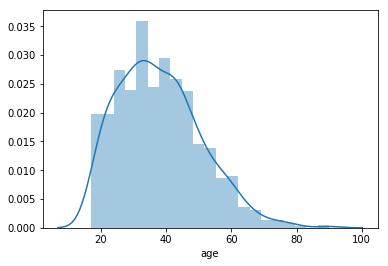

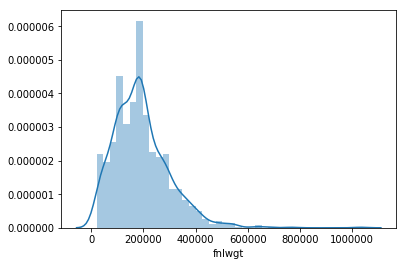

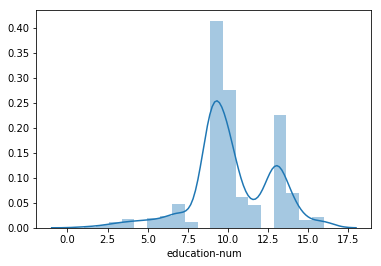

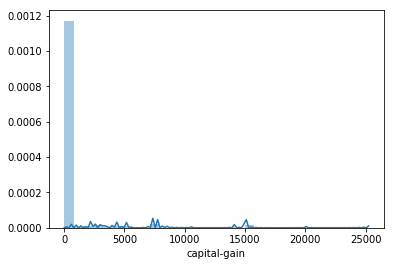

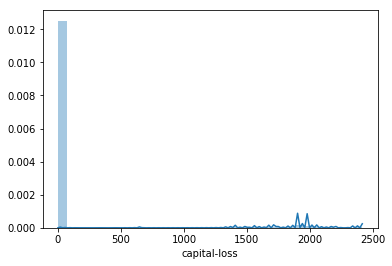

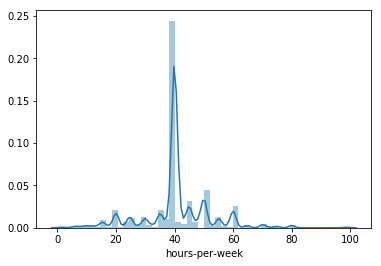

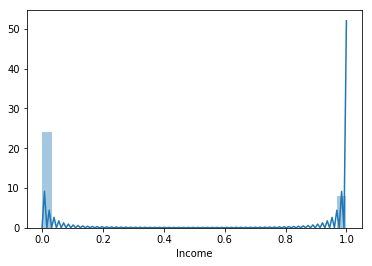

In [48]:
for col in num_cols.columns:
    sns.distplot(dataframe[col])
    plt.show()

### Majority of values in capital-gain and capital-loss are zeros. So remove the columns

In [57]:
(num_cols[['capital-gain','capital-loss']] == 0).sum()/num_cols.shape[0]

capital-gain    0.921512
capital-loss    0.944767
dtype: float64

In [58]:
num_cols.drop(['capital-gain','capital-loss'],axis =1,inplace =True)

### Check for skewness in the continuous data

In [74]:
num_cols.skew()

age               0.616951
fnlwgt                 NaN
education-num    -0.302642
hours-per-week    0.163424
Income            1.180474
dtype: float64

### The column `fnlwgt` is a highly right skewed column. Remove the skewness using a log transform and then check if the skewness has been removed by plotting its histogram

### Check for the pearson correlation between the continuous variables by plotting a heatmap

In [3]:
# Check for correlation between continuous variables


### Label Encode all the categorical variables

In [67]:
# Label Encode Categorical variables
for col in cat_cols.columns:
    lb =LabelEncoder()
    cat_cols[col] = lb.fit_transform(cat_cols[col])
cat_cols.head()

Workclass  education  marital-status  occupation  relationship  race  sex  \
0          5          9               4           0             1     4    1   
1          4          9               2           3             0     4    1   
2          2         11               0           5             1     4    1   
3          2          1               2           5             0     2    1   
4          2          9               2           9             5     2    0   

   native-country  
0              28  
1              28  
2              28  
3              28  
4               4

### Concatenate both the continuous and categorical dataframes

In [78]:
df = pd.concat([cat_cols,num_cols])

### Split into features and target

In [79]:
X =df.drop('Income',axis =1)
y =df.Income

### Fit a StandardScaler on the features

In [5]:
# Fitting a Standard Scaler 
scalar = StandardScaler()
train_x_scale = scalar.fit_transform


### Convert array to a dataframe

### Split into train and validation data

### Fit a logistic regression model

### Checking the accuracy, f1_score, confusion matrix

### Perform hyperparameter tuning using GridSearch

### Find the best parameters and the metrics after grid search